### BIBLIOTECAS

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score

### Algumas configurações para o matplotlib

In [4]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

#### IMPORTANDO OS DADOS DE TREINO E TESTE

In [5]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv')

#### TAMANHO DOS CONJUNTOS DE TRAIN E TEST

In [6]:
train.shape, test.shape

((13730, 166), (4576, 47))

#### SÃO 166 VARIÁVEIS DO CONJUNTO DE TREINO:

In [7]:
train.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=166)

#### SÃO 47 VARIÁVEIS DO CONJUNTO DE TEST 

In [8]:
 test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

### Os tipos das variáveis de train e test

In [9]:
print("Train: \n\n", train.dtypes.value_counts(),"\n\n Test: \n\n",test.dtypes.value_counts())

Train: 

 int64      78
object     60
float64    28
dtype: int64 

 Test: 

 int64      20
object     15
float64    12
dtype: int64


### VISUALIZANDO O CONJUNTO DE DADOS DE TRAIN

In [10]:
train.head(5)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


### VISUALIZANDO O CONJUNTO DE TEST

In [11]:
test.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


### PRÉ-PROCESSAMENTO DE DADOS 

####  Tomaremos as variáveis que estão na interseção do conjunto de train e test :

In [12]:
df_train = train[test.columns]
df_train['NU_NOTA_MT']=train['NU_NOTA_MT']

C:\Users\rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### RESUMO ESTATÍSTICO DAS VARIÁVEIS NUMÉRICAS

In [13]:
df_train.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4282.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,0.129862,2.259692,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,482.497928
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.336163,0.698586,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,99.826323
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,408.900000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,461.200000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,537.600000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,1.000000,4.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,952.000000


### UM RESUMO PARA CADA VARIÁVEL DO CONJUNTO DE TRAIN

In [14]:
df_aux = pd.DataFrame({'Type': df_train.dtypes,
                      'Missing': df_train.isna().sum(),
                      'Size': df_train.shape[0],
                       'Unique': df_train.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
TP_DEPENDENCIA_ADM_ESC,float64,9448,13730,4,68.812819
TP_ENSINO,float64,9448,13730,3,68.812819
Q027,object,7373,13730,13,53.699927
NU_NOTA_REDACAO,float64,3597,13730,53,26.198106
NU_NOTA_LC,float64,3597,13730,2774,26.198106
TP_STATUS_REDACAO,float64,3597,13730,9,26.198106
NU_NOTA_COMP1,float64,3597,13730,15,26.198106
NU_NOTA_COMP2,float64,3597,13730,13,26.198106
NU_NOTA_COMP3,float64,3597,13730,12,26.198106
NU_NOTA_COMP4,float64,3597,13730,14,26.198106


 ##### PODEMOS OBSERVAR ALGUMAS VARIÁVEIS COM VALORES AUSENTES:
 
 A princípio removeremos as variáveis com valores ausentes acima de 50%:
 

In [15]:
df_train.drop(columns=['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], inplace=True)

test.drop(columns=['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], inplace=True)

C:\Users\rodrigo\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Feature Engineering

#### Convertendo as variáveis TP_COR_RACA, TP_SEXO, Q001 , Q002, Q006, Q024, Q025 e Q026 para valores inteiros (0 ou 1)

In [16]:
# MACULINO - M = 0, FEMININO - F = 1
df_train['TP_SEXO'].replace(['M','F'],[0,1],inplace=True)
test['TP_SEXO'].replace(['M','F'],[0,1],inplace=True)

# Acesso a internet = 1, sem internet = 0
df_train['Q025'].replace(['A','B'],[0,1],inplace=True)
test['Q025'].replace(['A','B'],[0,1],inplace=True)

C:\Users\rodrigo\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
# dropar os não declarados
df_train=df_train.loc[df_train['TP_COR_RACA'] != 0]
test=test.loc[test['TP_COR_RACA'] != 0]

In [18]:
df_train = pd.get_dummies(df_train, columns=['SG_UF_RESIDENCIA','TP_COR_RACA','TP_ST_CONCLUSAO',
                                             'Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'], 
                        prefix=['UF_RESIDENCIA','COR_RACA','ST_CONCLUSAO','Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'])

test = pd.get_dummies(test, columns=['SG_UF_RESIDENCIA','TP_COR_RACA','TP_ST_CONCLUSAO',
                                             'Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'], 
                        prefix=['UF_RESIDENCIA','COR_RACA','ST_CONCLUSAO','Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'])

In [19]:
df_train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,...,Q024_D,Q024_E,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,0,1,4,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,1,1,0,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,0,1,4,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,18,1,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Reduzindo a quantidade de dummies**

In [20]:
df_train.drop(columns = ['Q025','TP_NACIONALIDADE','TP_ANO_CONCLUIU', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
                         'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_STATUS_REDACAO', 'TP_LINGUA',
                         'TP_ESCOLA'], inplace=True)

test.drop(columns = ['Q025','TP_NACIONALIDADE','TP_ANO_CONCLUIU', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 
                        'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_STATUS_REDACAO', 'TP_LINGUA', 
                        'TP_ESCOLA'], inplace=True)

In [21]:
# junta os que ganham mais que 5200
df_train['renda_>5280']=df_train['Q006_J']+df_train['Q006_K']+df_train['Q006_L']+df_train['Q006_M']+df_train['Q006_N']+df_train['Q006_O']+df_train['Q006_P']+df_train['Q006_Q']
df_train.drop(columns = ['Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q' ], inplace=True)

test['renda_>5280']=test['Q006_J']+test['Q006_K']+test['Q006_L']+test['Q006_M']+test['Q006_N']+test['Q006_O']+test['Q006_P']+test['Q006_Q']
test.drop(columns = ['Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q' ], inplace=True)

df_train['renda_>5280'].unique(), test['renda_>5280'].unique()

(array([0, 1], dtype=uint64), array([0, 1], dtype=uint64))

**Removendo os códigos das provas**

In [22]:
df_train.drop(columns = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'CO_UF_RESIDENCIA'], inplace=True)

test.drop(columns = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'CO_UF_RESIDENCIA'], inplace=True)

## Recursive Feature Elimination (RFE) e verificando a relevância das variáveis

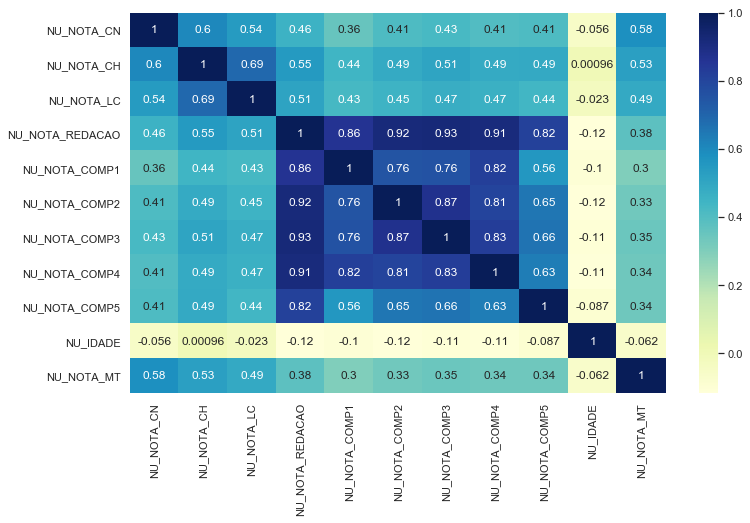

In [23]:
#Verificando a correlação das variáveis contínuas com a variável target (NU_NOTA_MT)
corr = df_train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_IDADE','NU_NOTA_MT']].corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

Podemos observar uma forte correlação entre cada nota de competência de redação com a nota de redação; diante disso, o interessante é removê-las, pois, podemos ter problemas de autocorrelação.


In [24]:
df_train.drop(columns = ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1'], inplace=True)

test.drop(columns = ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1'], inplace=True)

**Verificando a correlação das variáveis com a variável target (NU_NOTA_MT)**

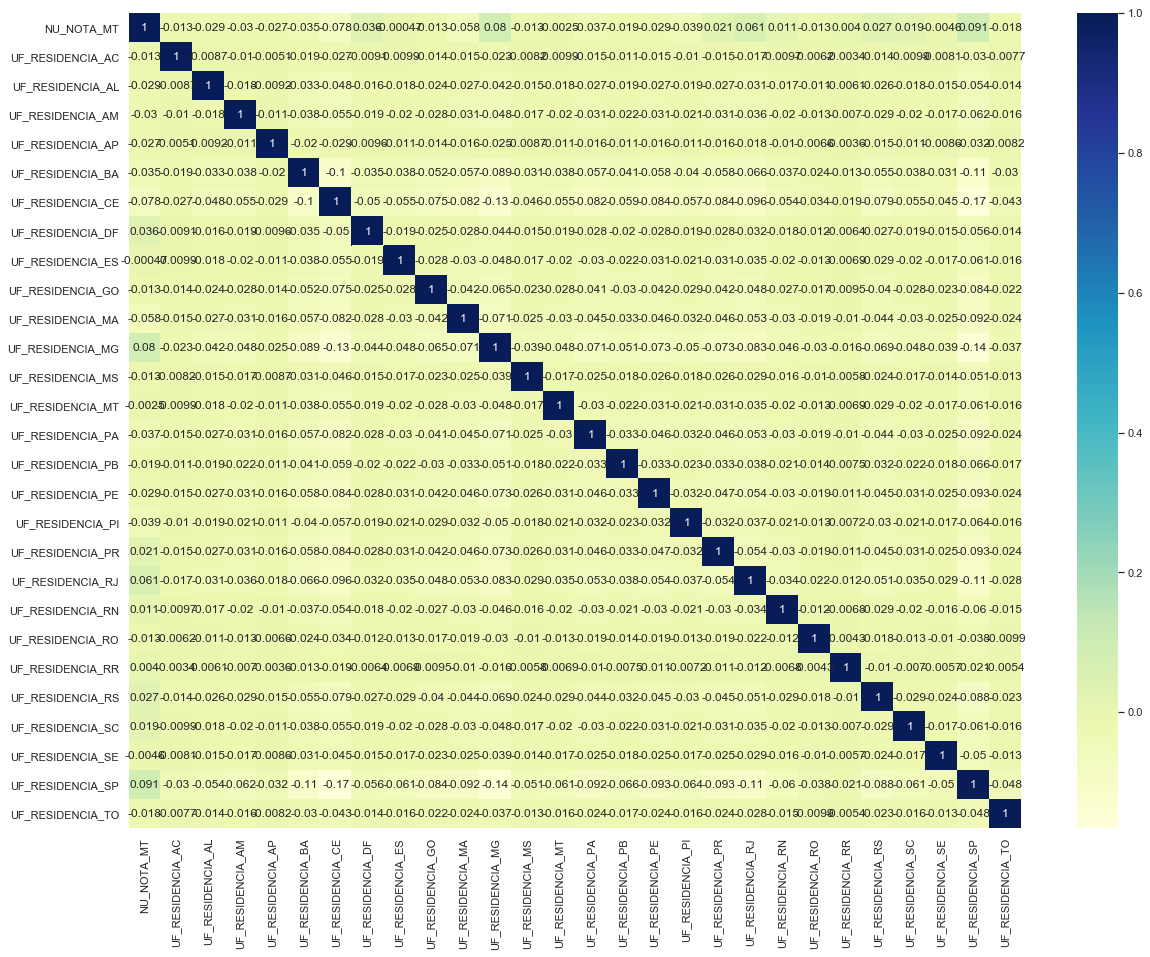

In [26]:
corr = df_train[['NU_NOTA_MT','UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

Podemos verificar que o estado do candidato não parece ser relevante para explicar a nota de matemática

In [34]:
df_train.drop(columns = ['UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO'], inplace=True)

test.drop(columns = ['UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO'], inplace=True)

 **Verificando a correlação das variáveis com a variável target (NU_NOTA_MT)**

In [35]:
corr = df_train[['NU_NOTA_MT', 'TP_SEXO', 'IN_TREINEIRO',
                 'COR_RACA_1', 'COR_RACA_2', 'COR_RACA_3', 'COR_RACA_4', 
                 'COR_RACA_5','ST_CONCLUSAO_1', 'ST_CONCLUSAO_2', 'ST_CONCLUSAO_3', 'ST_CONCLUSAO_4', 
                 'Q001_A', 'Q001_B', 'Q001_C','Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H',
                 'Q002_A', 'Q002_B','Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H', 'Q006_A','Q006_B', 
                 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H','Q006_I', 'Q026_A', 'Q026_B', 'Q026_C', 
                 'renda_>5280']].corr()
corr

,NU_NOTA_MT,TP_SEXO,IN_TREINEIRO,COR_RACA_1,COR_RACA_2,COR_RACA_3,COR_RACA_4,COR_RACA_5,ST_CONCLUSAO_1,ST_CONCLUSAO_2,...,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q026_A,Q026_B,Q026_C,renda_>5280
NU_NOTA_MT,1.000000,-0.183380,-0.024821,0.183791,-0.059241,-0.135237,0.012321,-0.022870,0.074496,-0.017219,...,0.009912,0.026663,0.061094,0.088017,0.119511,0.113939,0.011726,0.000717,-0.015442,0.291214
TP_SEXO,-0.183380,1.000000,0.026624,0.023092,-0.021392,-0.009355,0.023379,-0.029156,0.018646,-0.006632,...,-0.004718,-0.019646,-0.024004,-0.006424,-0.012101,-0.025435,0.058077,-0.017497,-0.051687,-0.038726
IN_TREINEIRO,-0.024821,0.026624,1.000000,0.006354,-0.038818,0.014863,0.012509,0.009973,-0.368500,-0.260162,...,-0.032058,-0.020687,-0.004314,-0.025049,0.004460,0.011210,0.285785,-0.174991,-0.160706,0.046382
COR_RACA_1,0.183791,0.023092,0.006354,1.000000,-0.281239,-0.712603,-0.110493,-0.062369,-0.013317,0.020281,...,0.021028,0.063949,0.072027,0.066635,0.085689,0.072949,-0.013094,-0.003325,0.019311,0.151901
COR_RACA_2,-0.059241,-0.021392,-0.038818,-0.281239,1.000000,-0.388682,-0.060267,-0.034018,0.051941,-0.029767,...,-0.001610,-0.017384,-0.018729,-0.021751,-0.031247,-0.016224,-0.043468,0.041740,0.008513,-0.043687
COR_RACA_3,-0.135237,-0.009355,0.014863,-0.712603,-0.388682,1.000000,-0.152705,-0.086196,-0.019430,0.000986,...,-0.022327,-0.044937,-0.050913,-0.043914,-0.056682,-0.058555,0.041459,-0.028213,-0.020336,-0.112871
COR_RACA_4,0.012321,0.023379,0.012509,-0.110493,-0.060267,-0.152705,1.000000,-0.013365,-0.002691,0.002742,...,0.011729,-0.006177,-0.006552,-0.003776,-0.004869,0.000968,0.003708,0.005176,-0.009929,0.004301
COR_RACA_5,-0.022870,-0.029156,0.009973,-0.062369,-0.034018,-0.086196,-0.013365,1.000000,-0.014024,-0.004709,...,-0.000186,-0.011583,-0.015358,-0.019257,-0.010619,0.000916,-0.003736,0.008464,-0.004405,-0.015602
ST_CONCLUSAO_1,0.074496,0.018646,-0.368500,-0.013317,0.051941,-0.019430,-0.002691,-0.014024,1.000000,-0.643094,...,0.039162,0.024272,0.015659,0.032124,0.001532,-0.017919,-0.398332,0.227630,0.241139,-0.023325
ST_CONCLUSAO_2,-0.017219,-0.006632,-0.260162,0.020281,-0.029767,0.000986,0.002742,-0.004709,-0.643094,1.000000,...,-0.017929,0.001558,-0.006132,0.007309,0.012760,0.025675,0.283450,-0.173437,-0.159525,0.016971


Verificamos IN_TREINEIRO está altamente correlacionado com ST_CONCLUSAO_3

In [36]:
df_train.drop(columns = ['IN_TREINEIRO'], inplace=True)

test.drop(columns = ['IN_TREINEIRO'], inplace=True)

**Selecionando variáveis mais bem correlacionadas**

In [37]:
df_analise = df_train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]

test = test[['NU_INSCRICAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]

**Adcionando Feature no conjunto de treino**

In [38]:
df_analise['NU_MEDIA'] = (df_train['NU_NOTA_CN'] + df_train['NU_NOTA_CH'] + df_train['NU_NOTA_LC'] + df_train['NU_NOTA_MT']+df_train['NU_NOTA_REDACAO'])/5
df_analise['NU_NOTA_MT']=df_train['NU_NOTA_MT']


C:\Users\rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Dropar valores nulos e candidatos que não compareceram nos dois dias de prova**

* **Imputando valores nan nos valores zero para podermos excluí-los**  

In [39]:
df_analise['NU_NOTA_CN'].replace({0: np.nan}, inplace=True) 
df_analise['NU_NOTA_CH'].replace({0: np.nan}, inplace=True)
df_analise['NU_NOTA_LC'].replace({0: np.nan}, inplace=True)
df_analise['NU_NOTA_REDACAO'].replace({0: np.nan}, inplace=True)
df_analise['NU_MEDIA'].replace({0: np.nan}, inplace=True)
df_analise['NU_NOTA_MT'].replace({0: np.nan}, inplace=True)

test['NU_NOTA_CN'].replace({0: np.nan}, inplace=True) 
test['NU_NOTA_CH'].replace({0: np.nan}, inplace=True)
test['NU_NOTA_LC'].replace({0: np.nan}, inplace=True)
test['NU_NOTA_REDACAO'].replace({0: np.nan}, inplace=True)


**Eliminando as linhas dos data frames com valores ausentes (nan,etc)**

In [40]:
df_analise.dropna(inplace=True)
test.dropna(inplace=True)

C:\Users\rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Visualização das variáveis do data Frame

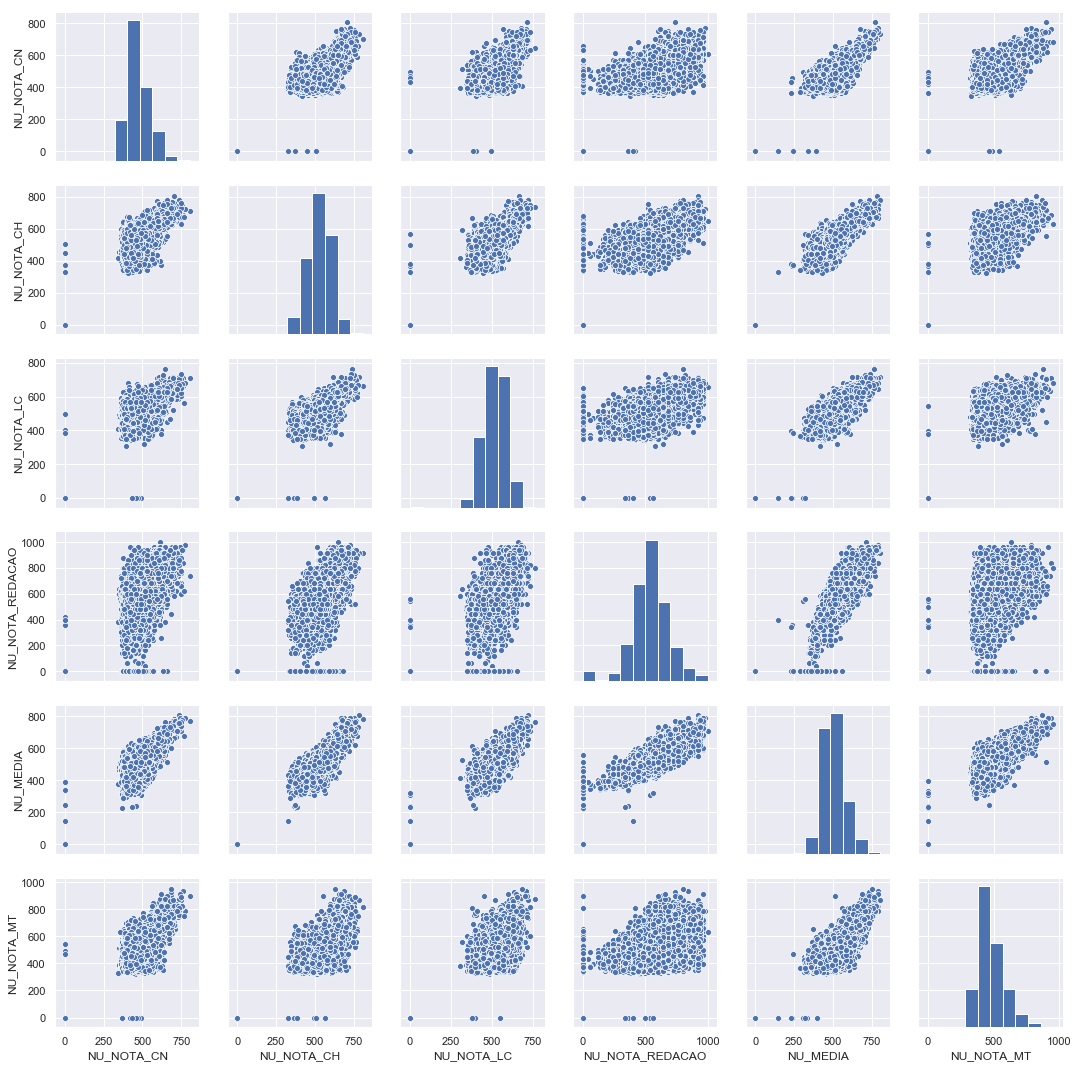

In [1114]:
sns.pairplot(df_analise)

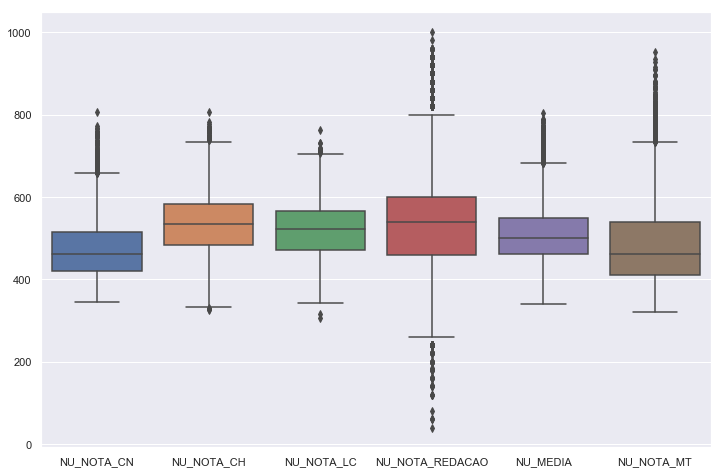

In [41]:
sns.boxplot(data=df_analise)

C:\Users\rodrigo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


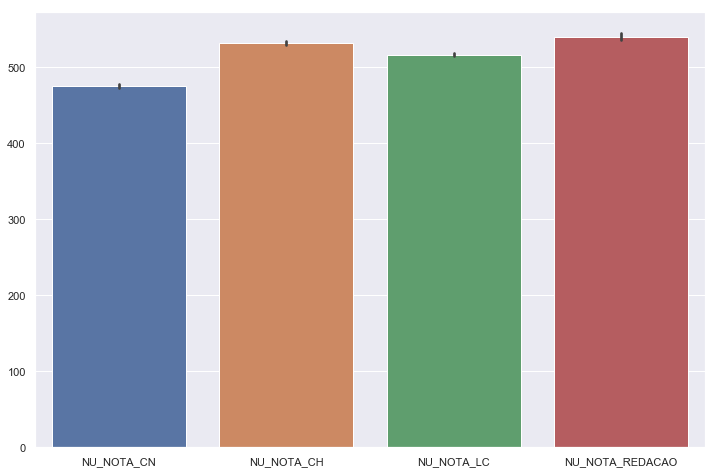

In [42]:
sns.barplot(data=test)

In [43]:
test.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
count,3234.000000,3234.000000,3234.000000,3234.000000
mean,474.429097,530.772913,515.900247,539.715523
std,70.238584,72.116586,65.793511,131.263976
min,362.500000,330.600000,343.700000,120.000000
25%,420.325000,481.700000,469.850000,460.000000
50%,459.400000,533.900000,518.150000,540.000000
75%,516.000000,580.300000,562.875000,600.000000
max,778.900000,773.600000,708.900000,980.000000


#### VERIFICANDO VALORES NULOS (NAN) 

In [44]:
df_analise.isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_MEDIA           0
NU_NOTA_MT         0
dtype: int64

In [45]:
test.isnull().sum()

NU_INSCRICAO       0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [46]:
df_analise.head(5)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_MEDIA,NU_NOTA_MT
1,436.3,495.4,581.2,520.0,486.46,399.4
2,474.5,544.1,599.0,580.0,531.48,459.8
6,439.7,583.2,410.9,620.0,483.66,364.5
7,420.1,604.2,484.5,560.0,519.60,529.2
8,619.6,625.8,611.2,620.0,608.66,566.7


### PREVISÃO DA MÉDIA

In [47]:
y = df_analise['NU_MEDIA']
X = df_analise.drop(columns=['NU_MEDIA','NU_NOTA_MT'])

### DIVIDINDO O CONJUNTO DE DADOS PARA TREINO E TESTE

In [48]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42) 

### REGRESSÃO MÚLTILINEAR

In [51]:
RLM = LinearRegression()
RLM.fit(X_train, y_train)
print('R squared:', RLM.score(X_test, y_test)),
print('MAE:',mean_absolute_error(y_test,RLM.predict(X_test))),
print('MSE:',mean_squared_error(y_test,RLM.predict(X_test)))

R squared: 0.9493761894914181
MAE: 12.540023350354327
MSE: 242.95025898477903


### REDGE REGRESSION

In [52]:
RRM = Ridge(alpha=1.0)
RRM.fit(X_train,y_train)
print('R squared:', RRM.score(X_test, y_test)),
print('MAE:',mean_absolute_error(y_test,RRM.predict(X_test))),
print('MSE:',mean_squared_error(y_test,RRM.predict(X_test)))

R squared: 0.9493761897724688
MAE: 12.540023336506962
MSE: 242.95025763598


### RANDOM FOREST REGRESSÃO

In [53]:
RFM = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators=10,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)
RFM.fit(X_train, y_train)

print('R squared:',RFM.score(X_test,y_test)),
print('MAE:',mean_absolute_error(y_test,RFM.predict(X_test))),
print('MSE:',mean_squared_error(y_test,RFM.predict(X_test)))

R squared: 0.9397435229437021
MAE: 13.516603715170278
MSE: 289.1786801362229


### PREVISÃO DA NOTA DE MT

In [54]:
y = df_analise['NU_NOTA_MT']
X = df_analise.drop(columns=['NU_NOTA_MT'])

### DIVIDINDO O CONJUNTO DE DADOS PARA TREINO E TESTE

In [55]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42) 

### REGRESSÃO MÚLTILINEAR

In [57]:
RL = LinearRegression()
RL.fit(X_train, y_train)
RL.score(X_test, y_test)

print('R squared:',RL.score(X_test,y_test)),
print('MAE:',mean_absolute_error(y_test,RL.predict(X_test))),
print('MSE:',mean_squared_error(y_test,RL.predict(X_test)))

R squared: 1.0
MAE: 3.676930334567024e-13
MSE: 2.0849577117393338e-25


### RIDGE REGRESSION

In [58]:
RR = Ridge(alpha=1.0)
RR.fit(X_train,y_train)
print('R squared:', RR.score(X_test, y_test)),
print('MAE:',mean_absolute_error(y_test,RR.predict(X_test))),
print('MSE:',mean_squared_error(y_test,RR.predict(X_test)))

R squared: 0.9999999999997101
MAE: 4.2045708832293874e-05
MSE: 2.7392354954075176e-09


### RANDOM FOREST REGRESSÃO

In [59]:
RF = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 10,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)
RF.fit(X_train, y_train)
print('R squared:', RF.score(X_test, y_test)),
print('MAE:',mean_absolute_error(y_test,RF.predict(X_test))),
print('MSE:',mean_squared_error(y_test,RF.predict(X_test)))

R squared: 0.7956802119003477
MAE: 35.14631578947368
MSE: 1930.7315631578945


### IMPRIMINDO Y_TRUE VERSUS Y_PRED 

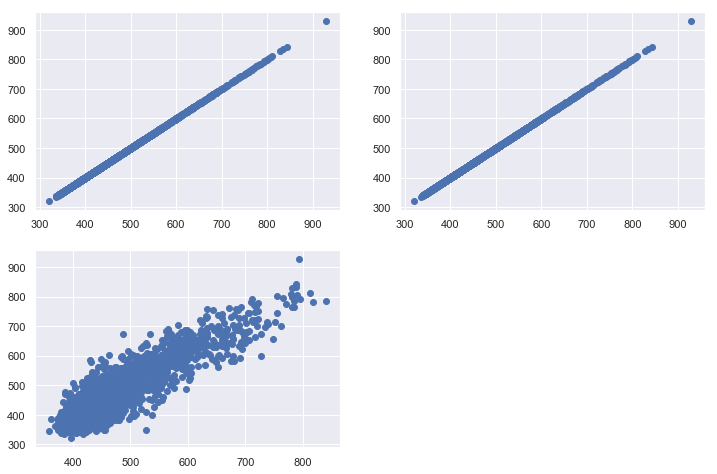

In [61]:
plt.subplot(221)
plt.scatter(RL.predict(X_test),y_test)
plt.subplot(222)
plt.scatter(RR.predict(X_test),y_test)
plt.subplot(223)
plt.scatter(RF.predict(X_test),y_test)

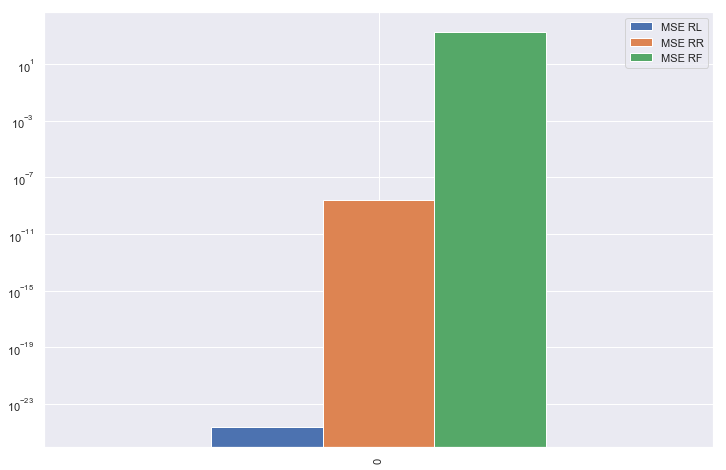

In [62]:
dic = {'MSE RL': [mean_squared_error(y_test,RL.predict(X_test))],'MSE RR':[mean_squared_error(y_test,RR.predict(X_test))],
       'MSE RF':[mean_squared_error(y_test,RF.predict(X_test))]}

pd.DataFrame(columns = dic, data=dic).plot.bar()
plt.yscale('log')


### FAZENDO PREVISÕES COM O CONJUNTO DE DADOS TEST

In [63]:
df_test= test.copy()

In [64]:
df_test.head(3)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0


### RECEBENDO PREDIÇÕES DE MÉDIA PARA O CONJUNTO DE TEST

In [65]:
df_test['NU_MEDIA'] = RFM.predict(df_test.iloc[:,1:])

In [66]:
df_test.head(3)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_MEDIA
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,434.809
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,493.737
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,581.506


### RECEBENDO PREDIÇÕES DE NOTA DE MATEMÁTICA PARA O CONJUNTO DE TEST

In [67]:
df_test['NU_NOTA_MT'] = RF.predict(df_test.iloc[:,1:])

In [68]:
df_test.head(3)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_MEDIA,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,434.809,439.37
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,493.737,462.16
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,581.506,636.69


### TRATAMENTO FINAL

In [69]:
df_test.drop(['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_MEDIA'],axis=1,inplace=True)

In [70]:
df_test.index = range(0,len(df_test.index))
df_test.head(5)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,439.370
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,462.160
2,b38a03232f43b11c9d0788abaf060f7366053b6d,636.690
3,715494628a50142ce8cb17191cfe6d0f3cae0934,479.365
4,e656d6bad65c93fb2880f1eba5037008c8e75774,449.835


### TRANSFORMANDO DATA SET DE RESPOSTA EM UM ARQUIVO CSV 

In [71]:
df_test.to_csv('answer.csv',index=False)

### ABRINDO O ARQUIVO CSV 

In [72]:
answer = pd.read_csv('answer.csv')
answer.head(5)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,439.370
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,462.160
2,b38a03232f43b11c9d0788abaf060f7366053b6d,636.690
3,715494628a50142ce8cb17191cfe6d0f3cae0934,479.365
4,e656d6bad65c93fb2880f1eba5037008c8e75774,449.835
